In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset (replace 'House_Price.csv' with your actual file path)
df = pd.read_csv('House_Price.csv')

# 1.1 (a) Summary statistics
n_instances = df.shape[0]
n_features = df.shape[1]
print(f"\nNumber of instances: {n_instances}")
print(f"Number of features: {n_features}")

# Separate numerical and categorical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=[np.number]).columns
print(f"Number of categorical features: {len(categorical_features)}")
print(f"Number of numerical features: {len(numerical_features)}")



# Ensure all columns intended to be numeric are converted to numeric
df[numerical_features] = df[numerical_features].apply(pd.to_numeric, errors='coerce')






Number of instances: 1460
Number of features: 81
Number of categorical features: 43
Number of numerical features: 38


In [ ]:
number_feature = df.select_dtypes(include = ['number'])
pearson_correlation = number_feature.corr(method='pearson')
target_corr = pearson_correlation['SalePrice']
target_corr = target_corr.drop(labels=['SalePrice'])
target_corr_sorted = target_corr.sort_values(ascending=False)
print("Top 5 numerical features highly correlated wwith the target variable: \n",target_corr_sorted.head(5) )

Top 5 numerical features highly correlated wwith the target variable: 
 OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64


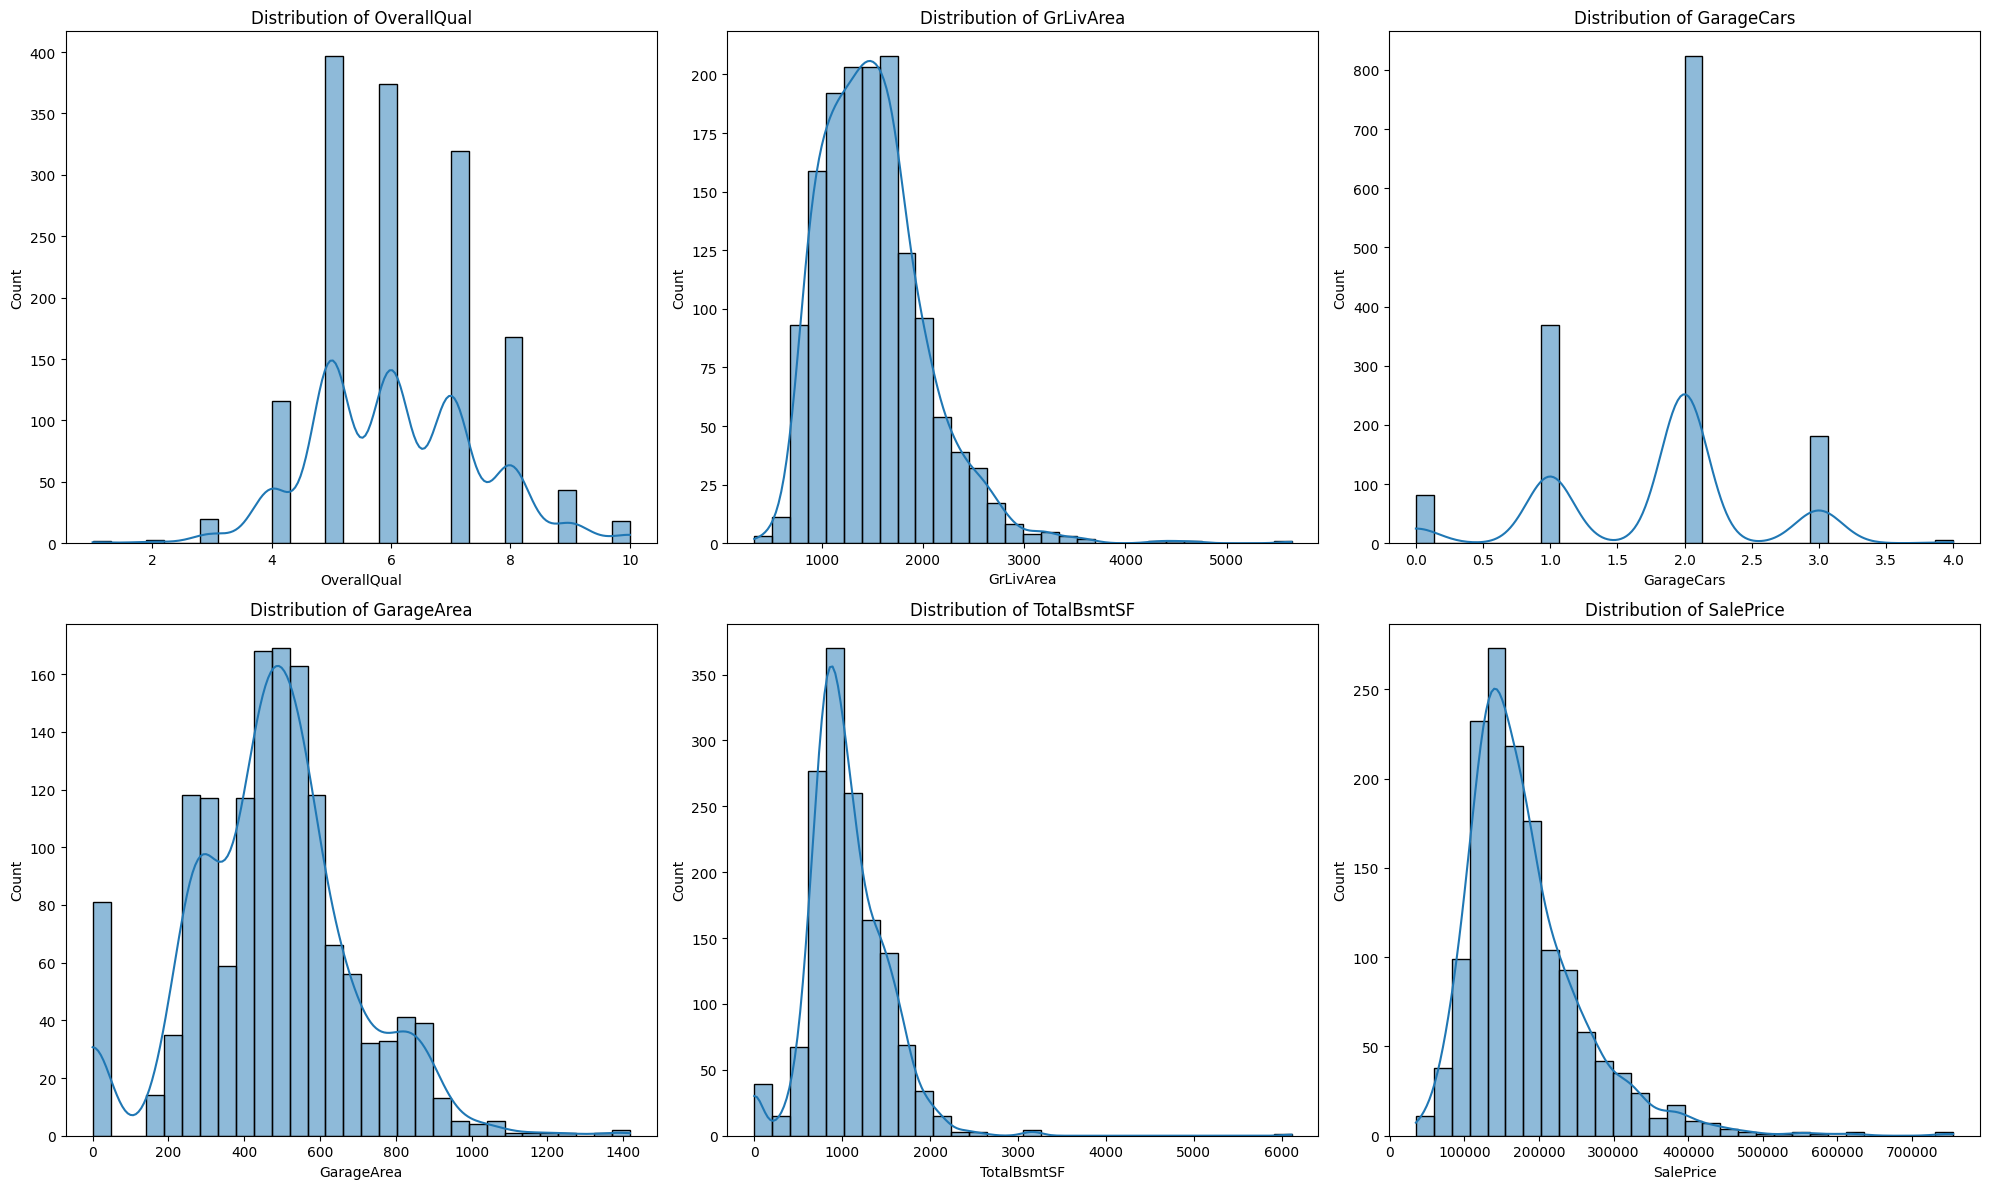

In [ ]:
# Assuming `target_corr_sorted` contains the sorted correlations of features with SalePrice.
# We'll take the top 5 features if there are more than 5.
top_5_features = target_corr_sorted.index[:5]

# 1.1 (c) Plot the distributions of these 5 numerical features and the target variable
plt.figure(figsize=(20, 12))

for i, feature in enumerate(top_5_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")

# Plot the target variable 'SalePrice' as the last plot
plt.subplot(2, 3, 6)
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")

plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis
print("\nSkewness and Kurtosis for top 5 features:")
for feature in top_5_features:
    skewness = stats.skew(df[feature].dropna())
    kurtosis = stats.kurtosis(df[feature].dropna())
    print(f"{feature} - Skewness: {skewness:.4f}, Kurtosis: {kurtosis:.4f}")

# Calculate skewness and kurtosis for SalePrice as well
saleprice_skewness = stats.skew(df['SalePrice'].dropna())
saleprice_kurtosis = stats.kurtosis(df['SalePrice'].dropna())
print(f"SalePrice - Skewness: {saleprice_skewness:.4f}, Kurtosis: {saleprice_kurtosis:.4f}")


In [ ]:
missing_values = df.isnull().sum()
missing_values_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values[missing_values > 0],
    'Percent of Total Values': missing_values_percent[missing_values_percent > 0]
})
print(missing_data)


Skewness and Kurtosis for top 5 features:
OverallQual - Skewness: 0.2167, Kurtosis: 0.0919
GrLivArea - Skewness: 1.3652, Kurtosis: 4.8743
GarageCars - Skewness: -0.3422, Kurtosis: 0.2161
GarageArea - Skewness: 0.1798, Kurtosis: 0.9098
TotalBsmtSF - Skewness: 1.5227, Kurtosis: 13.2010
SalePrice - Skewness: 1.8809, Kurtosis: 6.5098
              Missing Values  Percent of Total Values
LotFrontage              259                17.739726
Alley                   1369                93.767123
MasVnrType               872                59.726027
MasVnrArea                 8                 0.547945
BsmtQual                  37                 2.534247
BsmtCond                  37                 2.534247
BsmtExposure              38                 2.602740
BsmtFinType1              37                 2.534247
BsmtFinType2              38                 2.602740
Electrical                 1                 0.068493
FireplaceQu              690                47.260274
GarageType         

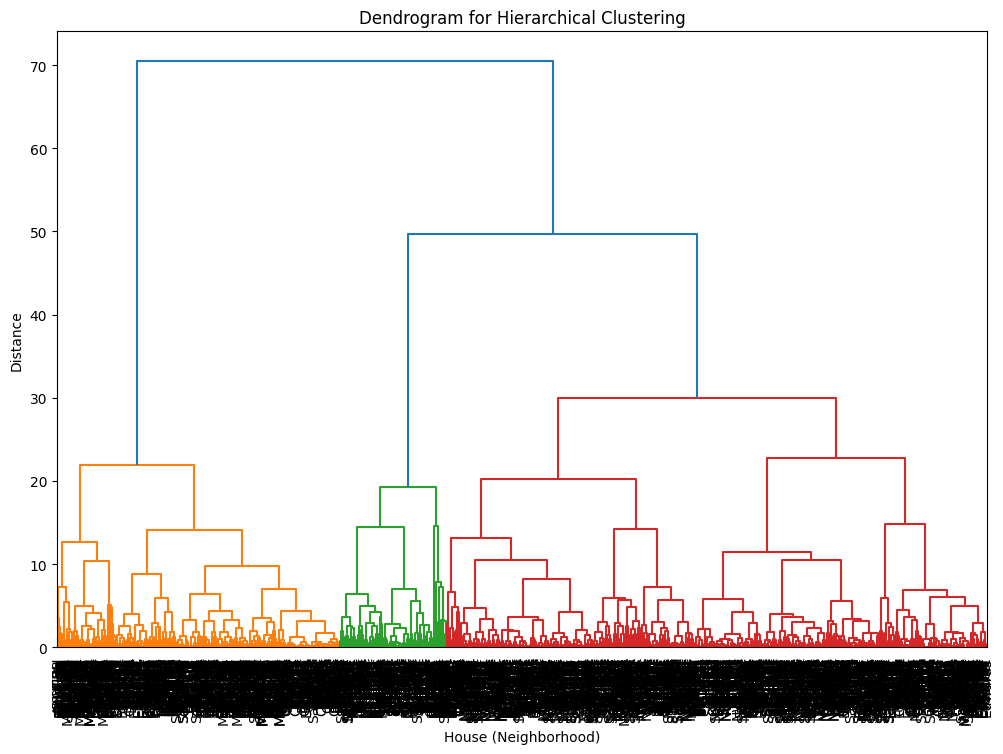

In [ ]:
# Selecting the relevant features
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df['Neighborhood'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('House (Neighborhood)')
plt.ylabel('Distance')
plt.show()




In [ ]:
from sklearn.model_selection import train_test_split

# Drop the 'Id' column as it's not useful for predictions
X = df.drop(columns=['Id', 'SalePrice'])
y = df['SalePrice']

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=309)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (1022, 79), (1022,)
Test set: (438, 79), (438,)


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create an imputer object to fill missing values
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the numerical columns
X_train[numerical_features] = numeric_imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = numeric_imputer.transform(X_test[numerical_features])

# Apply the imputer to the categorical columns
X_train[categorical_features] = categorical_imputer.fit_transform(X_train[categorical_features])
X_test[categorical_features] = categorical_imputer.transform(X_test[categorical_features])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Use one-hot encoding for categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform the training set
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Transform the test set
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convert the encoded arrays back to DataFrames
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

# Drop the original categorical columns and concatenate the encoded columns
X_train = pd.concat([X_train.drop(columns=categorical_features), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_features), X_test_encoded], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [5, 10, 14, 15, 16, 27, 40, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [ ]:
# Combine the features and target variable for saving
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save to CSV files
train_data.to_csv('train_data_processed.csv', index=False)
test_data.to_csv('test_data_processed.csv', index=False)


In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the processed training data
train_data = pd.read_csv('train_data_processed.csv')
test_data = pd.read_csv('test_data_processed.csv')

# Separate features and target variable
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Apply PCA
pca = PCA(n_components=0.95)  # retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)

# Print the explained variance ratio to understand how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_


# Print the cumulative variance explained
cumulative_variance = explained_variance.cumsum()

# Standardize the test data
X_test_scaled = scaler.transform(X_test)

# Apply the PCA transformation
X_test_pca = pca.transform(X_test_scaled)
# Convert the PCA-transformed data back to DataFrame for saving
X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca_df = pd.DataFrame(X_test_pca)

# Concatenate the target variable back with the features
train_data_pca = pd.concat([X_train_pca_df, y_train.reset_index(drop=True)], axis=1)
test_data_pca = pd.concat([X_test_pca_df, y_test.reset_index(drop=True)], axis=1)

# Save to CSV files
train_data_pca.to_csv('train_data_pca.csv', index=False)
test_data_pca.to_csv('test_data_pca.csv', index=False)


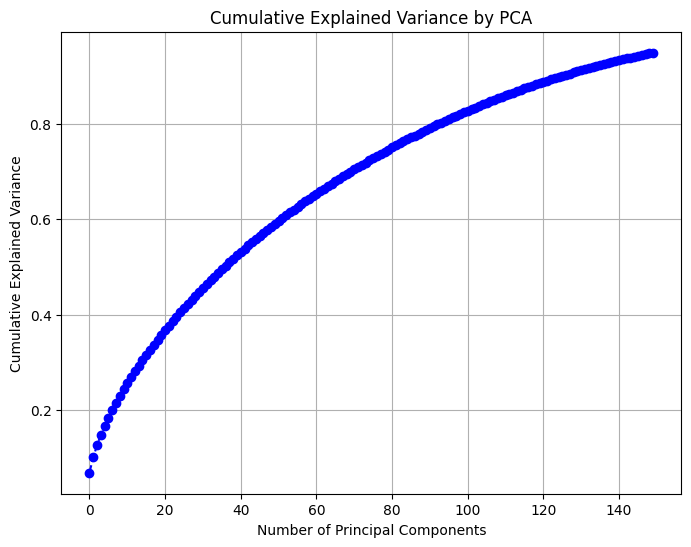

In [ ]:
import matplotlib.pyplot as plt

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.show()

Selected Features: Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'ExterQual_Gd', 'ExterQual_TA'],
      dtype='object')


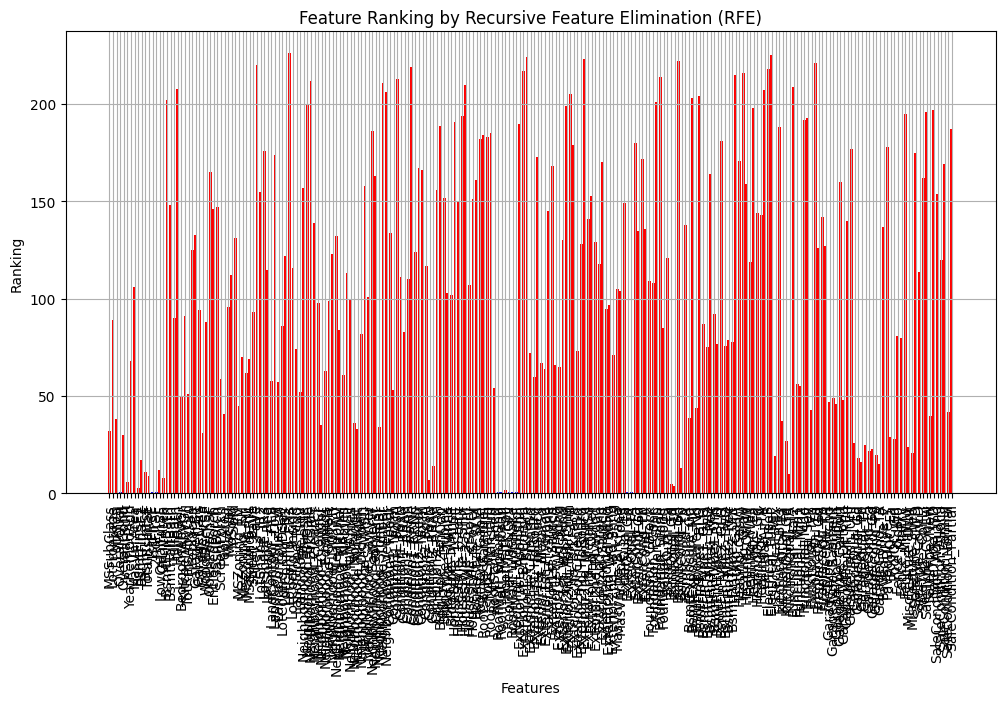

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming train_data and test_data are your original datasets loaded previously
# Assuming train_data_scaled and test_data_scaled are the standardized feature datasets

# Separate features and target variable (assuming 'SalePrice' is the target)
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']
X_test = test_data.drop('SalePrice', axis=1)
y_test = test_data['SalePrice']

# Initialize a linear regression model
model = LinearRegression()

# Initialize RFE model with the linear regression estimator
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features

# Fit the RFE model on the scaled data
rfe.fit(X_train_scaled, y_train)  # Use scaled feature data and target variable

# Get the ranking of features
ranking = rfe.ranking_
selected_features = X_train.columns[rfe.support_]

print("Selected Features:", selected_features)

# Transform the train and test data to keep only the selected features
train_rfe = rfe.transform(X_train_scaled)
test_rfe = rfe.transform(X_test_scaled)

# Convert to DataFrame for easier interpretation
train_rfe_df = pd.DataFrame(train_rfe, columns=selected_features)
test_rfe_df = pd.DataFrame(test_rfe, columns=selected_features)

# Add the target variable (SalePrice) back to the DataFrame
train_rfe_df['SalePrice'] = y_train.reset_index(drop=True)
test_rfe_df['SalePrice'] = y_test.reset_index(drop=True)

# Save RFE reduced data
train_rfe_df.to_csv('train_rfe_data.csv', index=False)
test_rfe_df.to_csv('test_rfe_data.csv', index=False)

# Plot feature ranking (full ranking, not just selected features)
plt.figure(figsize=(12, 6))
plt.bar(range(len(ranking)), ranking, color=['blue' if rfe.support_[i] else 'red' for i in range(len(ranking))], align='center')
plt.xticks(range(len(ranking)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Feature Ranking by Recursive Feature Elimination (RFE)')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the PCA-reduced training and test data
train_pca_df = pd.read_csv('train_pca_data.csv')
test_pca_df = pd.read_csv('test_pca_data.csv')

# Load the RFE-reduced training and test data
train_rfe_df = pd.read_csv('train_rfe_data.csv')
test_rfe_df = pd.read_csv('test_rfe_data.csv')

# Separate features and target variable for PCA data
X_train_pca = train_pca_df.drop('SalePrice', axis=1)
y_train_pca = train_pca_df['SalePrice']
X_test_pca = test_pca_df.drop('SalePrice', axis=1)
y_test_pca = test_pca_df['SalePrice']

# Separate features and target variable for RFE data
X_train_rfe = train_rfe_df.drop('SalePrice', axis=1)
y_train_rfe = train_rfe_df['SalePrice']
X_test_rfe = test_rfe_df.drop('SalePrice', axis=1)
y_test_rfe = test_rfe_df['SalePrice']

# Initialize the models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.5)

# ------------------- PCA Model Training and Evaluation -------------------

# Train and evaluate the models using PCA-selected features
linear_reg.fit(X_train_pca, y_train_pca)
ridge_reg.fit(X_train_pca, y_train_pca)

# Predictions on training and test sets for PCA
train_pred_lr_pca = linear_reg.predict(X_train_pca)
test_pred_lr_pca = linear_reg.predict(X_test_pca)
train_pred_ridge_pca = ridge_reg.predict(X_train_pca)
test_pred_ridge_pca = ridge_reg.predict(X_test_pca)

# Calculate MSE for PCA
mse_train_lr_pca = mean_squared_error(y_train_pca, train_pred_lr_pca)
mse_test_lr_pca = mean_squared_error(y_test_pca, test_pred_lr_pca)
mse_train_ridge_pca = mean_squared_error(y_train_pca, train_pred_ridge_pca)
mse_test_ridge_pca = mean_squared_error(y_test_pca, test_pred_ridge_pca)

# Display PCA results
print("PCA - Linear Regression MSE on Training Set:", mse_train_lr_pca)
print("PCA - Linear Regression MSE on Test Set:", mse_test_lr_pca)
print("PCA - Ridge Regression MSE on Training Set:", mse_train_ridge_pca)
print("PCA - Ridge Regression MSE on Test Set:", mse_test_ridge_pca)

# ------------------- RFE Model Training and Evaluation -------------------

# Train and evaluate the models using RFE-selected features
linear_reg.fit(X_train_rfe, y_train_rfe)
ridge_reg.fit(X_train_rfe, y_train_rfe)

# Predictions on training and test sets for RFE
train_pred_lr_rfe = linear_reg.predict(X_train_rfe)
test_pred_lr_rfe = linear_reg.predict(X_test_rfe)
train_pred_ridge_rfe = ridge_reg.predict(X_train_rfe)
test_pred_ridge_rfe = ridge_reg.predict(X_test_rfe)

# Calculate MSE for RFE
mse_train_lr_rfe = mean_squared_error(y_train_rfe, train_pred_lr_rfe)
mse_test_lr_rfe = mean_squared_error(y_test_rfe, test_pred_lr_rfe)
mse_train_ridge_rfe = mean_squared_error(y_train_rfe, train_pred_ridge_rfe)
mse_test_ridge_rfe = mean_squared_error(y_test_rfe, test_pred_ridge_rfe)

# Display RFE results
print("RFE - Linear Regression MSE on Training Set:", mse_train_lr_rfe)
print("RFE - Linear Regression MSE on Test Set:", mse_test_lr_rfe)
print("RFE - Ridge Regression MSE on Training Set:", mse_train_ridge_rfe)
print("RFE - Ridge Regression MSE on Test Set:", mse_test_ridge_rfe)


PCA - Linear Regression MSE on Training Set: 740994331.7455847
PCA - Linear Regression MSE on Test Set: 907345167.5120841
PCA - Ridge Regression MSE on Training Set: 740994583.8351365
PCA - Ridge Regression MSE on Test Set: 906976758.17879
RFE - Linear Regression MSE on Training Set: 1481262038.2293465
RFE - Linear Regression MSE on Test Set: 1464705844.646565
RFE - Ridge Regression MSE on Training Set: 1481275288.55449
RFE - Ridge Regression MSE on Test Set: 1461890394.3429892


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have already loaded and prepared the data

# ------------------- PCA Model Training and Evaluation -------------------

# Initialize and train the Random Forest model on PCA-reduced data
rf_model_pca = RandomForestRegressor(random_state=42)
rf_model_pca.fit(X_train_pca, y_train_pca)

# Predictions on training and test sets for PCA
train_pred_rf_pca = rf_model_pca.predict(X_train_pca)
test_pred_rf_pca = rf_model_pca.predict(X_test_pca)

# Calculate MSE for PCA with Random Forest
mse_train_rf_pca = mean_squared_error(y_train_pca, train_pred_rf_pca)
mse_test_rf_pca = mean_squared_error(y_test_pca, test_pred_rf_pca)

# Display PCA results for Random Forest
print("PCA - Random Forest MSE on Training Set:", mse_train_rf_pca)
print("PCA - Random Forest MSE on Test Set:", mse_test_rf_pca)

# ------------------- RFE Model Training and Evaluation -------------------

# Initialize and train the Random Forest model on RFE-reduced data
rf_model_rfe = RandomForestRegressor(random_state=42)
rf_model_rfe.fit(X_train_rfe, y_train_rfe)

# Predictions on training and test sets for RFE
train_pred_rf_rfe = rf_model_rfe.predict(X_train_rfe)
test_pred_rf_rfe = rf_model_rfe.predict(X_test_rfe)

# Calculate MSE for RFE with Random Forest
mse_train_rf_rfe = mean_squared_error(y_train_rfe, train_pred_rf_rfe)
mse_test_rf_rfe = mean_squared_error(y_test_rfe, test_pred_rf_rfe)

# Display RFE results for Random Forest
print("RFE - Random Forest MSE on Training Set:", mse_train_rf_rfe)
print("RFE - Random Forest MSE on Test Set:", mse_test_rf_rfe)

# ------------------- Comparison with Linear and Ridge Regression -------------------

# Assuming you've already calculated the MSEs for Linear Regression and Ridge Regression

print("\n--- Comparison of Results ---")

# Display comparison for PCA
print("\nPCA Comparison:")
print("Linear Regression MSE on Test Set:", mse_test_lr_pca)
print("Ridge Regression MSE on Test Set:", mse_test_ridge_pca)
print("Random Forest MSE on Test Set:", mse_test_rf_pca)

# Display comparison for RFE
print("\nRFE Comparison:")
print("Linear Regression MSE on Test Set:", mse_test_lr_rfe)
print("Ridge Regression MSE on Test Set:", mse_test_ridge_rfe)
print("Random Forest MSE on Test Set:", mse_test_rf_rfe)


PCA - Random Forest MSE on Training Set: 188018727.74252057
PCA - Random Forest MSE on Test Set: 991234944.3407896
RFE - Random Forest MSE on Training Set: 213858000.3464638
RFE - Random Forest MSE on Test Set: 1063801249.2131745

--- Comparison of Results ---

PCA Comparison:
Linear Regression MSE on Test Set: 907345167.5120841
Ridge Regression MSE on Test Set: 906976758.17879
Random Forest MSE on Test Set: 991234944.3407896

RFE Comparison:
Linear Regression MSE on Test Set: 1464705844.646565
Ridge Regression MSE on Test Set: 1461890394.3429892
Random Forest MSE on Test Set: 1063801249.2131745


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have already loaded and prepared the data as in previous parts

# Initialize the models
lasso_reg = Lasso(alpha=0.5)
svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# ------------------- PCA Model Training and Evaluation -------------------

# Train and evaluate the Lasso Regression model on PCA-reduced data
lasso_reg.fit(X_train_pca, y_train_pca)
train_pred_lasso_pca = lasso_reg.predict(X_train_pca)
test_pred_lasso_pca = lasso_reg.predict(X_test_pca)
mse_train_lasso_pca = mean_squared_error(y_train_pca, train_pred_lasso_pca)
mse_test_lasso_pca = mean_squared_error(y_test_pca, test_pred_lasso_pca)

# Train and evaluate the SVR model on PCA-reduced data
svr_reg.fit(X_train_pca, y_train_pca)
train_pred_svr_pca = svr_reg.predict(X_train_pca)
test_pred_svr_pca = svr_reg.predict(X_test_pca)
mse_train_svr_pca = mean_squared_error(y_train_pca, train_pred_svr_pca)
mse_test_svr_pca = mean_squared_error(y_test_pca, test_pred_svr_pca)

# ------------------- RFE Model Training and Evaluation -------------------

# Train and evaluate the Lasso Regression model on RFE-reduced data
lasso_reg.fit(X_train_rfe, y_train_rfe)
train_pred_lasso_rfe = lasso_reg.predict(X_train_rfe)
test_pred_lasso_rfe = lasso_reg.predict(X_test_rfe)
mse_train_lasso_rfe = mean_squared_error(y_train_rfe, train_pred_lasso_rfe)
mse_test_lasso_rfe = mean_squared_error(y_test_rfe, test_pred_lasso_rfe)

# Train and evaluate the SVR model on RFE-reduced data
svr_reg.fit(X_train_rfe, y_train_rfe)
train_pred_svr_rfe = svr_reg.predict(X_train_rfe)
test_pred_svr_rfe = svr_reg.predict(X_test_rfe)
mse_train_svr_rfe = mean_squared_error(y_train_rfe, train_pred_svr_rfe)
mse_test_svr_rfe = mean_squared_error(y_test_rfe, test_pred_svr_rfe)

# ------------------- Display and Compare Results -------------------

print("\n--- PCA Results ---")
print("Lasso Regression MSE on Training Set:", mse_train_lasso_pca)
print("Lasso Regression MSE on Test Set:", mse_test_lasso_pca)
print("SVR MSE on Training Set:", mse_train_svr_pca)
print("SVR MSE on Test Set:", mse_test_svr_pca)

print("\n--- RFE Results ---")
print("Lasso Regression MSE on Training Set:", mse_train_lasso_rfe)
print("Lasso Regression MSE on Test Set:", mse_test_lasso_rfe)
print("SVR MSE on Training Set:", mse_train_svr_rfe)
print("SVR MSE on Test Set:", mse_test_svr_rfe)

# Comparison with previous models (assuming you have calculated these earlier)
print("\n--- Comparison with Linear and Ridge Regression ---")

print("\nPCA Comparison:")
print("Linear Regression MSE on Test Set:", mse_test_lr_pca)
print("Ridge Regression MSE on Test Set:", mse_test_ridge_pca)
print("Lasso Regression MSE on Test Set:", mse_test_lasso_pca)
print("SVR MSE on Test Set:", mse_test_svr_pca)

print("\nRFE Comparison:")
print("Linear Regression MSE on Test Set:", mse_test_lr_rfe)
print("Ridge Regression MSE on Test Set:", mse_test_ridge_rfe)
print("Lasso Regression MSE on Test Set:", mse_test_lasso_rfe)
print("SVR MSE on Test Set:", mse_test_svr_rfe)



--- PCA Results ---
Lasso Regression MSE on Training Set: 740994371.3728526
Lasso Regression MSE on Test Set: 907247142.887763
SVR MSE on Training Set: 6639344314.234385
SVR MSE on Test Set: 6777870684.19869

--- RFE Results ---
Lasso Regression MSE on Training Set: 1481262065.446458
Lasso Regression MSE on Test Set: 1464576219.011459
SVR MSE on Training Set: 6629177776.570238
SVR MSE on Test Set: 6767241710.831373

--- Comparison with Linear and Ridge Regression ---

PCA Comparison:
Linear Regression MSE on Test Set: 907345167.5120841
Ridge Regression MSE on Test Set: 906976758.17879
Lasso Regression MSE on Test Set: 907247142.887763
SVR MSE on Test Set: 6777870684.19869

RFE Comparison:
Linear Regression MSE on Test Set: 1464705844.646565
Ridge Regression MSE on Test Set: 1461890394.3429892
Lasso Regression MSE on Test Set: 1464576219.011459
SVR MSE on Test Set: 6767241710.831373
